In [118]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [119]:
# Reading the dataset
import pandas as pd
import numpy as np
insurancedata=pd.read_csv('E:/Work/Jobathon/train_Df64byy.csv', encoding='latin')
print('Shape before deleting duplicate values:', insurancedata.shape)

# Removing duplicate rows if any
insurancedata=insurancedata.drop_duplicates()
print('Shape After deleting duplicate values:', insurancedata.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
insurancedata.head(5)

Shape before deleting duplicate values: (50882, 14)
Shape After deleting duplicate values: (50882, 14)


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [120]:
# Drop id as per hackathron condition
insurancedata=insurancedata.drop(['ID'],axis=1)

In [121]:
insurancedata.columns

Index(['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Health Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response'],
      dtype='object')

# Defining the problem statement: 
#### Create a Predictive model which can tell if a person will survive the titanic crash or not?
* Target Variable: Response
* Predictors: 'ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
              'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
              'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
              'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'


* Response=0 Customer did not show interest in the recommended policy
* Response=1 Customer showed interest in the recommended policy

# Determining the type of Machine Learning
Based on the problem statement, understand that we need to create a supervised ML classification model, as the target variable is categorical.

# Looking at the distribution of Target variable

<AxesSubplot:xlabel='Response'>

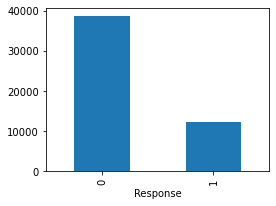

In [122]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=insurancedata.groupby('Response').size()
GroupedData.plot(kind='bar', figsize=(4,3))

#### SMOTE can be use to level Targetvariable if accuracy is low.

# Basic Data Exploration

In [123]:
insurancedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50882 entries, 0 to 50881
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                50882 non-null  object 
 1   Region_Code              50882 non-null  int64  
 2   Accomodation_Type        50882 non-null  object 
 3   Reco_Insurance_Type      50882 non-null  object 
 4   Upper_Age                50882 non-null  int64  
 5   Lower_Age                50882 non-null  int64  
 6   Is_Spouse                50882 non-null  object 
 7   Health Indicator         39191 non-null  object 
 8   Holding_Policy_Duration  30631 non-null  object 
 9   Holding_Policy_Type      30631 non-null  float64
 10  Reco_Policy_Cat          50882 non-null  int64  
 11  Reco_Policy_Premium      50882 non-null  float64
 12  Response                 50882 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 5.4+ MB


In [124]:
# Looking at the descriptive statistics of the data
insurancedata.describe(include='all')

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882,50882.000000,50882,50882,50882.000000,50882.000000,50882,39191,30631,30631.000000,50882.000000,50882.000000,50882.000000
unique,36,NaN,2,2,NaN,NaN,2,9,15,NaN,NaN,NaN,NaN
top,C1,NaN,Owned,Individual,NaN,NaN,No,X1,1.0,NaN,NaN,NaN,NaN
freq,8973,NaN,27951,40536,NaN,NaN,42460,13010,4499,NaN,NaN,NaN,NaN
mean,NaN,1732.788707,NaN,NaN,44.856275,42.738866,NaN,NaN,NaN,2.439228,15.115188,14183.950069,0.239947
std,NaN,1424.081652,NaN,NaN,17.310271,17.319375,NaN,NaN,NaN,1.025923,6.340663,6590.074873,0.427055
min,NaN,1.000000,NaN,NaN,18.000000,16.000000,NaN,NaN,NaN,1.000000,1.000000,2280.000000,0.000000
25%,NaN,523.000000,NaN,NaN,28.000000,27.000000,NaN,NaN,NaN,1.000000,12.000000,9248.000000,0.000000
50%,NaN,1391.000000,NaN,NaN,44.000000,40.000000,NaN,NaN,NaN,3.000000,17.000000,13178.000000,0.000000
75%,NaN,2667.000000,NaN,NaN,59.000000,57.000000,NaN,NaN,NaN,3.000000,20.000000,18096.000000,0.000000


In [125]:
# Finging unique values for each column
insurancedata.nunique()

City_Code                    36
Region_Code                5316
Accomodation_Type             2
Reco_Insurance_Type           2
Upper_Age                    58
Lower_Age                    60
Is_Spouse                     2
Health Indicator              9
Holding_Policy_Duration      15
Holding_Policy_Type           4
Reco_Policy_Cat              22
Reco_Policy_Premium        6977
Response                      2
dtype: int64

In [126]:
# Finding missing value
insurancedata.isnull().sum()

City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

# Basic Data Exploration Results

The selected columns in this step are not final, further study will be done and then a final list will be created

* <b> City_Code </b>               :  Categorical. Selected.    <b> Need further investigation  </b> 
* <b> Region_Code </b>             :  Categorical. Selected.   <b> Need further investigation </b> 
* <b> Accomodation_Type </b>       :  Categorical. Selected.       
* <b> Reco_Insurance_Type    </b>   : Categorical. Selected.       
* <b> Upper_Age            </b>     : Continuous. Selected.     
* <b> Lower_Age           </b>      : Continuous. Selected.    
* <b> Is_Spouse           </b>      : Categorical. Selected.      
* <b> Health Indicator   </b>       : Categorical. Selected.    <b> Need further investigation as high missing value</b> 
* <b> Holding_Policy_Duration </b>   : Categorical. Selected.    <b> Need further investigation as high missing value</b>
* <b> Holding_Policy_Type    </b>   : Categorical. Selected.     <b> Need further investigation as high missing value</b>
* <b> Reco_Policy_Cat       </b>     : Categorical. Selected.    
* <b> Reco_Policy_Premium   </b>     : Continuous. Selected. 
* <b> Response              </b>     : Categorical. Selected.   <b> TargetVariable  </b> 

In [127]:
['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Type', 'Reco_Policy_Cat']

['City_Code',
 'Region_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Health Indicator',
 'Holding_Policy_Type',
 'Reco_Policy_Cat']

# Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

In [128]:
# Plotting multiple bar charts at once for categorical variables

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots( nrows=len(colsToPlot),ncols=1, figsize=(10,50))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

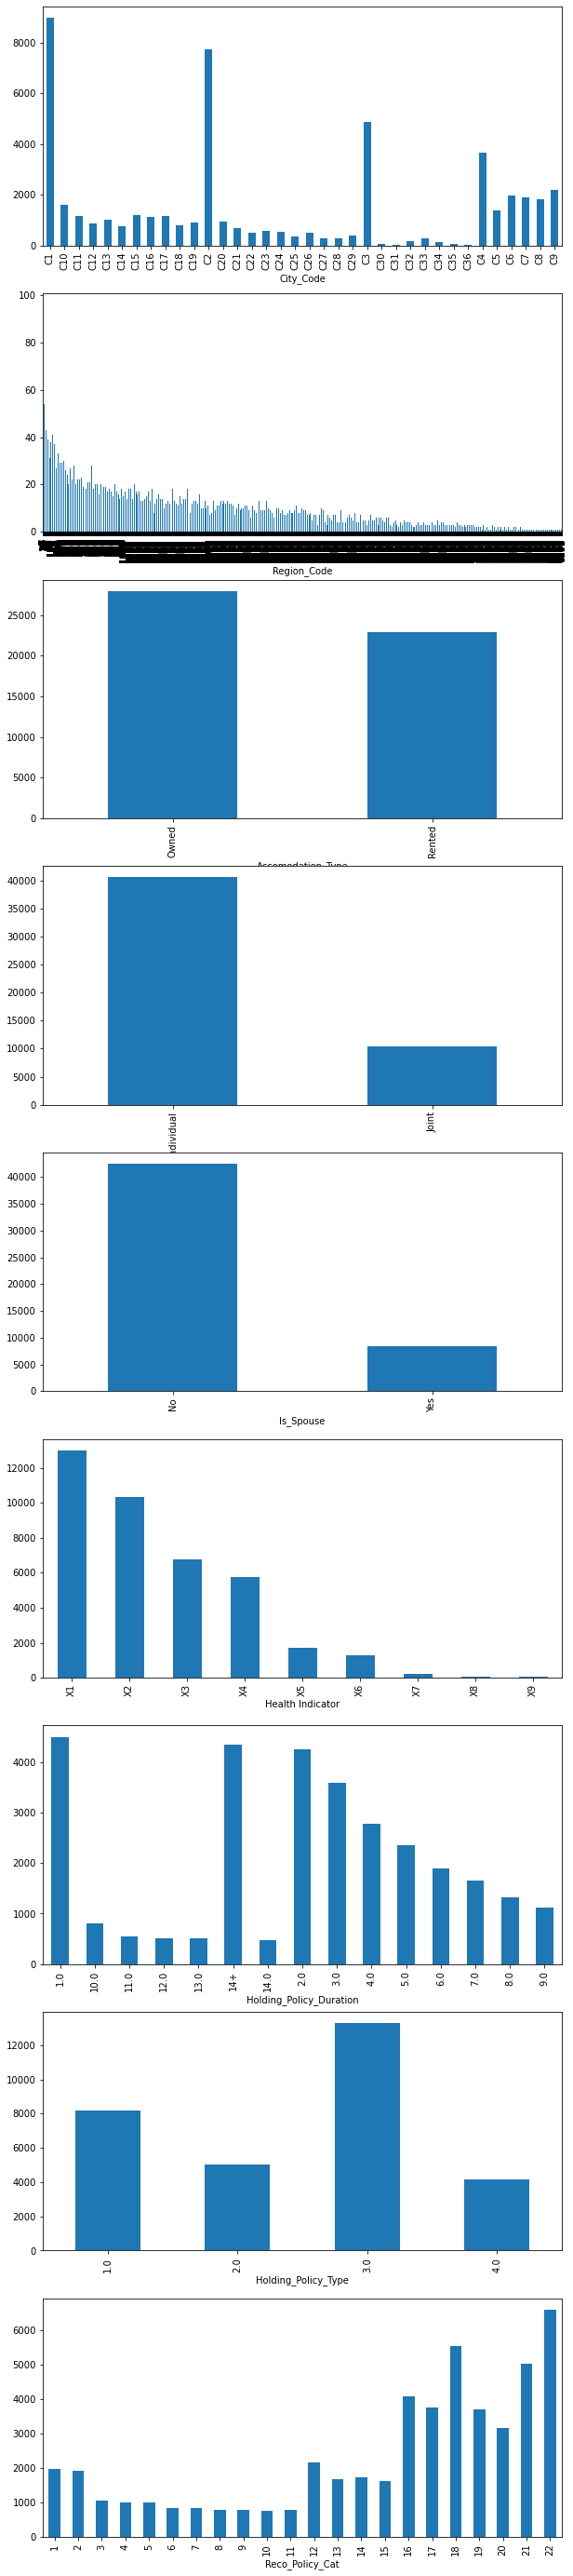

In [129]:
#####################################################################
# Calling the function
PlotBarCharts(inpData=insurancedata, colsToPlot=['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
                                                 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration','Holding_Policy_Type', 'Reco_Policy_Cat']
             )

array([[<AxesSubplot:title={'center':'Upper_Age'}>,
        <AxesSubplot:title={'center':'Lower_Age'}>],
       [<AxesSubplot:title={'center':'Reco_Policy_Premium'}>,
        <AxesSubplot:>]], dtype=object)

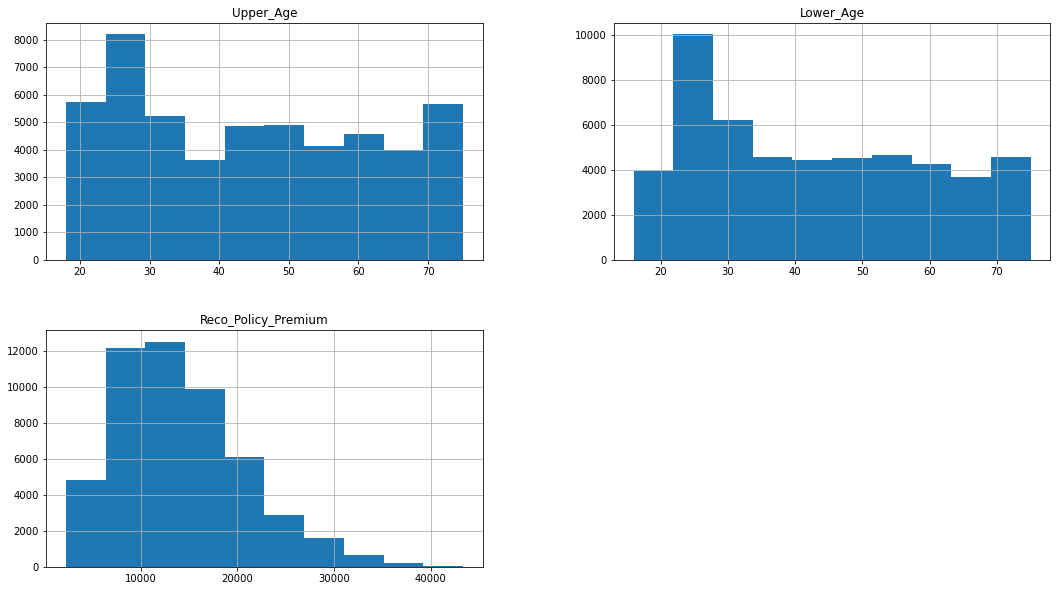

In [130]:
# Plotting histograms of multiple columns together
insurancedata.hist(['Upper_Age','Lower_Age','Reco_Policy_Premium'], figsize=(18,10))

# Missing values treatment

In [134]:
# Finding missing value
insurancedata.isnull().sum()

City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [136]:

insurancedata['Health Indicator'].fillna(value=insurancedata['Health Indicator'].mode()[0], inplace=True)
insurancedata['Holding_Policy_Duration'].fillna(value=insurancedata['Holding_Policy_Duration'].mode()[0], inplace=True)
insurancedata['Holding_Policy_Type'].fillna(value=insurancedata['Holding_Policy_Type'].mode()[0], inplace=True)

## Converting the binary nominal variable to numeric using 1/0 mapping

In [151]:
# Converting the binary nominal variable sex to numeric

insurancedata['Accomodation_Type'].replace({'Owned':0, 'Rented':1}, inplace=True)
insurancedata['Reco_Insurance_Type'].replace({'Individual':0, 'Joint':1}, inplace=True)
insurancedata['Is_Spouse'].replace({'No':0, 'Yes':1}, inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

### Converting Reco policy type to object

In [152]:
insurancedata['Reco_Policy_Cat']=insurancedata['Reco_Policy_Cat'].astype('object') 
insurancedata['Holding_Policy_Type']=insurancedata['Holding_Policy_Type'].astype('object')

## Converting the nominal variable to numeric using get_dummies()

In [153]:
SelectedColumns=['City_Code','Reco_Policy_Cat','Health Indicator','Holding_Policy_Duration','Holding_Policy_Type']

# Selecting final columns
numeric=insurancedata[SelectedColumns]

# Treating all the nominal variables at once using dummy variables
numeric=pd.get_dummies(numeric)

# Adding Target Variable to the data
numeric['Accomodation_Type']=insurancedata['Accomodation_Type']
numeric['Reco_Insurance_Type']=insurancedata['Reco_Insurance_Type']
numeric['Is_Spouse']=insurancedata['Is_Spouse']
numeric['Reco_Policy_Premium']=insurancedata['Reco_Policy_Premium']
numeric['Upper_Age']=insurancedata['Upper_Age']
numeric['Lower_Age']=insurancedata['Lower_Age']                      
numeric['Response']=insurancedata['Response']

In [171]:
# Separate Target Variable and Predictor Variables
targetvariable='Response'
predictors=[]

for i in numeric.columns: 
    predictors.append(i)

predictors.remove(targetvariable)

X=numeric[predictors].values
y=numeric[targetvariable].values

In [172]:
X

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.16280e+04,
        3.60000e+01, 3.60000e+01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 3.05100e+04,
        7.50000e+01, 2.20000e+01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 7.45000e+03,
        3.20000e+01, 3.20000e+01],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.13740e+04,
        6.30000e+01, 6.30000e+01],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.81792e+04,
        7.10000e+01, 4.90000e+01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.14240e+04,
        2.40000e+01, 2.40000e+01]])

In [175]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [180]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35617, 92)
(15265, 92)
(35617,)
(15265,)


0.5035018842021209
Feature: 0, Score: -0.17674
Feature: 1, Score: -0.15038
Feature: 2, Score: -0.13330
Feature: 3, Score: -0.11466
Feature: 4, Score: 0.14075
Feature: 5, Score: 0.02211
Feature: 6, Score: -0.27745
Feature: 7, Score: -0.14060
Feature: 8, Score: -0.07296
Feature: 9, Score: -0.14913
Feature: 10, Score: 0.28285
Feature: 11, Score: -0.14448
Feature: 12, Score: -0.13554
Feature: 13, Score: -0.23202
Feature: 14, Score: 0.07969
Feature: 15, Score: 0.20916
Feature: 16, Score: 0.05445
Feature: 17, Score: -0.01470
Feature: 18, Score: -0.20033
Feature: 19, Score: 0.26242
Feature: 20, Score: 0.17075
Feature: 21, Score: 0.11536
Feature: 22, Score: -0.12484
Feature: 23, Score: 0.31521
Feature: 24, Score: -0.89870
Feature: 25, Score: 0.40445
Feature: 26, Score: 0.16613
Feature: 27, Score: 0.55650
Feature: 28, Score: 0.35139
Feature: 29, Score: -0.19912
Feature: 30, Score: -0.05449
Feature: 31, Score: 0.08737
Feature: 32, Score: -0.08844
Feature: 33, Score: -0.07964
Feature: 34, Score: 

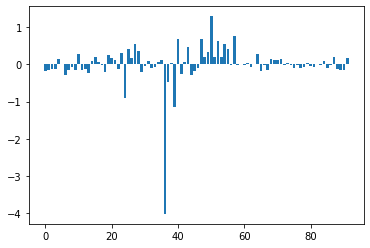

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

model=LogisticRegression(C=3,penalty='l2', max_iter=500,solver='newton-cg')
clf=model.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print(roc_auc_score(y_test,y_pred))

# get importance
importance = clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()